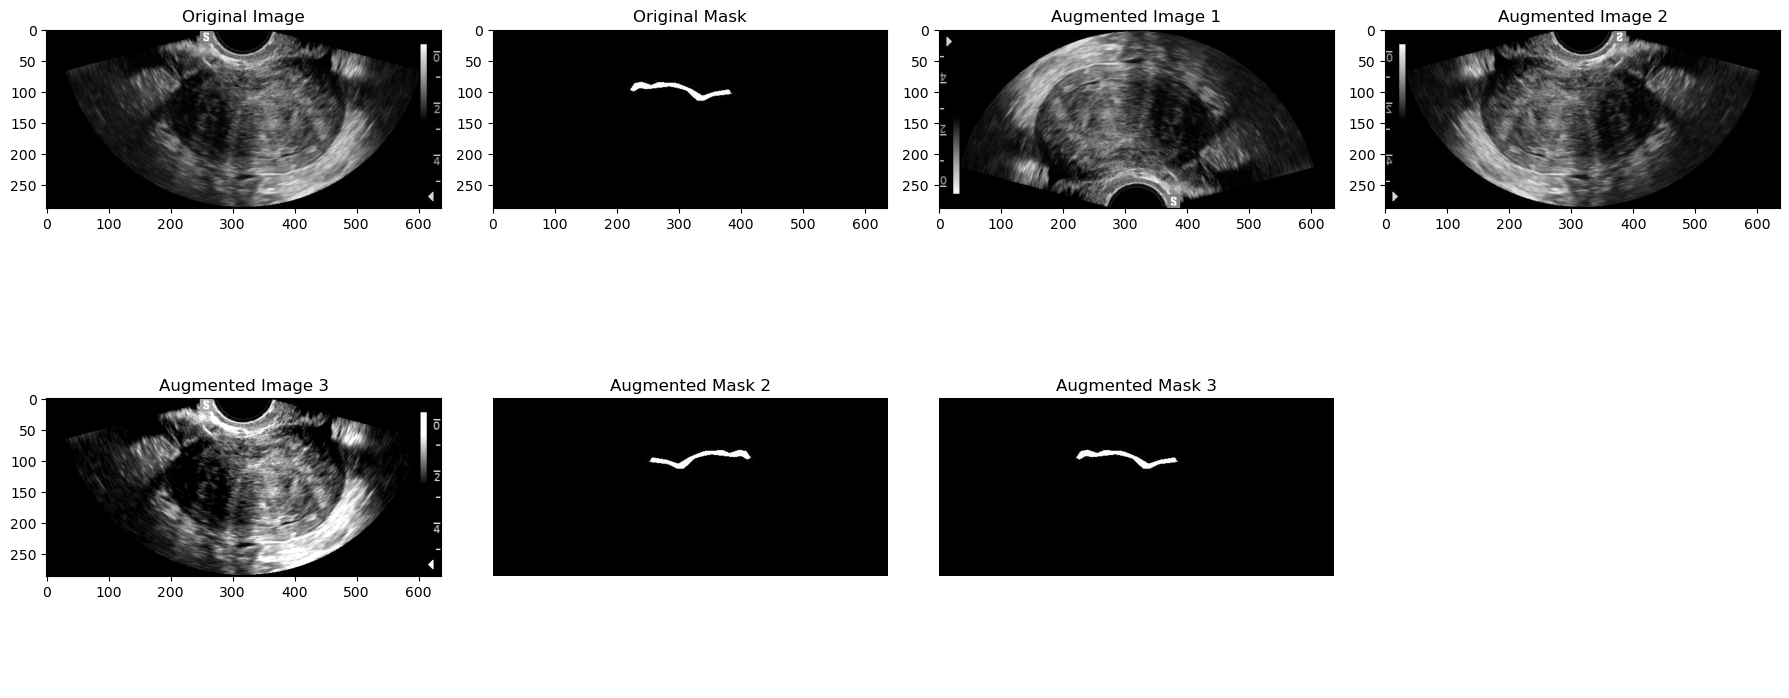

In [31]:
import numpy as np
from PIL import Image, ImageEnhance
import cv2
import matplotlib.pyplot as plt

def load_single_frame(image_path, mask_path):
    img = np.array(Image.open(image_path).convert('L'))
    mask = np.array(Image.open(mask_path).convert('L'))
    return img, mask

def rotate_180(image, mask):
    rotated_image = np.rot90(image, 2)
    rotated_mask = np.rot90(mask, 2)
    return rotated_image, rotated_mask

def flip_lr(image, mask):
    flipped_image = np.fliplr(image)
    flipped_mask = np.fliplr(mask)
    return flipped_image, flipped_mask

def adjust_contrast(image, mask, factor=1.5):
    pil_img = Image.fromarray(image)
    enhancer = ImageEnhance.Contrast(pil_img)
    contrast_image = enhancer.enhance(factor)
    contrast_image = np.array(contrast_image)
    return contrast_image, mask

def display_images(original_image, original_mask, augmented_images, augmented_masks):
    fig, axes = plt.subplots(2, 4, figsize=(18, 8))
    axes = axes.ravel()

    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[1].imshow(original_mask, cmap='gray')
    axes[1].set_title('Original Mask')

    for i, (aug_img, aug_mask) in enumerate(zip(augmented_images, augmented_masks)):
        axes[2 + i].imshow(aug_img, cmap='gray')
        axes[2 + i].set_title(f'Augmented Image {i+1}')
        axes[4 + i].imshow(aug_mask, cmap='gray')
        axes[4 + i].set_title(f'Augmented Mask {i+1}')
    
    # Hide any unused subplots
    for j in range(2 + len(augmented_images), len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    image_path = r"Y:\Uterine_segmentation\AdenomyosisPatients\Bmode\CEUSPILOT021\Bmode_frame_1.jpg"
    mask_path = r"Y:\Uterine_segmentation\AdenomyosisPatients\Delineations\CEUSPILOT021\Bmode_frame_1.jpg"
    
    original_image, original_mask = load_single_frame(image_path, mask_path)
    
    rotated_image, rotated_mask = rotate_180(original_image, original_mask)
    flipped_image, flipped_mask = flip_lr(original_image, original_mask)
    contrast_image, contrast_mask = adjust_contrast(original_image, original_mask)
    
    augmented_images = [rotated_image, flipped_image, contrast_image]
    augmented_masks = [rotated_mask, flipped_mask, contrast_mask]
    
    display_images(original_image, original_mask, augmented_images, augmented_masks)


In [29]:
import numpy as np
from PIL import Image, ImageEnhance
import cv2
import os
import random
from glob import glob

def load_single_frame(image_path, mask_path):
    img = np.array(Image.open(image_path).convert('L'))
    mask = np.array(Image.open(mask_path).convert('L'))
    return img, mask

def rotate_180(image, mask):
    rotated_image = np.rot90(image, 2)
    rotated_mask = np.rot90(mask, 2)
    return rotated_image, rotated_mask

def flip_lr(image, mask):
    flipped_image = np.fliplr(image)
    flipped_mask = np.fliplr(mask)
    return flipped_image, flipped_mask

def adjust_contrast(image, mask, factor=1.5):
    pil_img = Image.fromarray(image)
    enhancer = ImageEnhance.Contrast(pil_img)
    contrast_image = enhancer.enhance(factor)
    contrast_image = np.array(contrast_image)
    return contrast_image, mask

def save_image_and_mask(image, mask, save_img_dir, save_mask_dir, base_name, aug_type):
    image = Image.fromarray(image)
    mask = Image.fromarray(mask)
    image.save(os.path.join(save_img_dir, f"{base_name}_{aug_type}.jpg"))
    mask.save(os.path.join(save_mask_dir, f"{base_name}_{aug_type}_mask.jpg"))

def process_and_save_images(image_dirs, mask_dirs, save_dir, max_frames=200):
    for img_dir, mask_dir in zip(image_dirs, mask_dirs):
        patient_id = os.path.basename(img_dir)
        save_img_dir = os.path.join(save_dir, patient_id, 'images')
        save_mask_dir = os.path.join(save_dir, patient_id, 'masks')
        
        if not os.path.exists(save_img_dir):
            os.makedirs(save_img_dir)
        
        if not os.path.exists(save_mask_dir):
            os.makedirs(save_mask_dir)
        
        image_paths = sorted(glob(os.path.join(img_dir, '*.jpg')))
        mask_paths = sorted(glob(os.path.join(mask_dir, '*.jpg')))
        
        selected_indices = random.sample(range(len(image_paths)), min(max_frames, len(image_paths)))
        
        for idx in selected_indices:
            img_path = image_paths[idx]
            mask_path = mask_paths[idx]
            base_name = os.path.splitext(os.path.basename(img_path))[0]
            
            original_image, original_mask = load_single_frame(img_path, mask_path)
            
            # Perform augmentations
            rotated_image, rotated_mask = rotate_180(original_image, original_mask)
            flipped_image, flipped_mask = flip_lr(original_image, original_mask)
            contrast_image, contrast_mask = adjust_contrast(original_image, original_mask)
            
            # Save original and augmented images
            save_image_and_mask(original_image, original_mask, save_img_dir, save_mask_dir, base_name, "original")
            save_image_and_mask(rotated_image, rotated_mask, save_img_dir, save_mask_dir, base_name, "rotated")
            save_image_and_mask(flipped_image, flipped_mask, save_img_dir, save_mask_dir, base_name, "flipped")
            save_image_and_mask(contrast_image, contrast_mask, save_img_dir, save_mask_dir, base_name, "contrast")

if __name__ == "__main__":
    image_dirs = [
        r'Y:\Uterine_segmentation\HealthyVolunteers\Bmode\UV013',
        r'Y:\Uterine_segmentation\HealthyVolunteers\Bmode\UV015',
        r'Y:\Uterine_segmentation\HealthyVolunteers\Bmode\UV017',
        r'Y:\Uterine_segmentation\HealthyVolunteers\Bmode\UV031',
        r'Y:\Uterine_segmentation\HealthyVolunteers\Bmode\UV034',
        r'Y:\Uterine_segmentation\HealthyVolunteers\Bmode\UV036',
        r'Y:\Uterine_segmentation\HealthyVolunteers\Bmode\UV038',
        r'Y:\Uterine_segmentation\AdenomyosisPatients\Bmode\CEUSPILOT004',
        r'Y:\Uterine_segmentation\AdenomyosisPatients\Bmode\CEUSPILOT019',
        r'Y:\Uterine_segmentation\AdenomyosisPatients\Bmode\CEUSPILOT020',
        r'Y:\Uterine_segmentation\AdenomyosisPatients\Bmode\CEUSPILOT021',
        r'Y:\Uterine_segmentation\AdenomyosisPatients\Bmode\CEUSPILOT026',
        r'Y:\Uterine_segmentation\AdenomyosisPatients\Bmode\CEUSPILOT034',
        r'Y:\Uterine_segmentation\AdenomyosisPatients\Bmode\CEUSPILOT035',
        r'Y:\Uterine_segmentation\AdenomyosisPatients\Bmode\UV008',
        r'Y:\Uterine_segmentation\AdenomyosisPatients\Bmode\UV009',
        r'Y:\Uterine_segmentation\AdenomyosisPatients\Bmode\UV014',
    ]

    mask_dirs = [
        r'Y:\Uterine_segmentation\HealthyVolunteers\Delineations\UV013',
        r'Y:\Uterine_segmentation\HealthyVolunteers\Delineations\UV015',
        r'Y:\Uterine_segmentation\HealthyVolunteers\Delineations\UV017',
        r'Y:\Uterine_segmentation\HealthyVolunteers\Delineations\UV031',
        r'Y:\Uterine_segmentation\HealthyVolunteers\Delineations\UV034',
        r'Y:\Uterine_segmentation\HealthyVolunteers\Delineations\UV036',
        r'Y:\Uterine_segmentation\HealthyVolunteers\Delineations\UV038',
        r'Y:\Uterine_segmentation\AdenomyosisPatients\Delineations\CEUSPILOT004',
        r'Y:\Uterine_segmentation\AdenomyosisPatients\Delineations\CEUSPILOT019',
        r'Y:\Uterine_segmentation\AdenomyosisPatients\Delineations\CEUSPILOT020',
        r'Y:\Uterine_segmentation\AdenomyosisPatients\Delineations\CEUSPILOT021',
        r'Y:\Uterine_segmentation\AdenomyosisPatients\Delineations\CEUSPILOT026',
        r'Y:\Uterine_segmentation\AdenomyosisPatients\Delineations\CEUSPILOT034',
        r'Y:\Uterine_segmentation\AdenomyosisPatients\Delineations\CEUSPILOT035',
        r'Y:\Uterine_segmentation\AdenomyosisPatients\Delineations\UV008',
        r'Y:\Uterine_segmentation\AdenomyosisPatients\Delineations\UV009',
        r'Y:\Uterine_segmentation\AdenomyosisPatients\Delineations\UV014',
    ]

    save_dir = r'Y:\Uterine_segmentation\Auto_segmentation_Mohammad\augmented'

    process_and_save_images(image_dirs, mask_dirs, save_dir, max_frames=200)


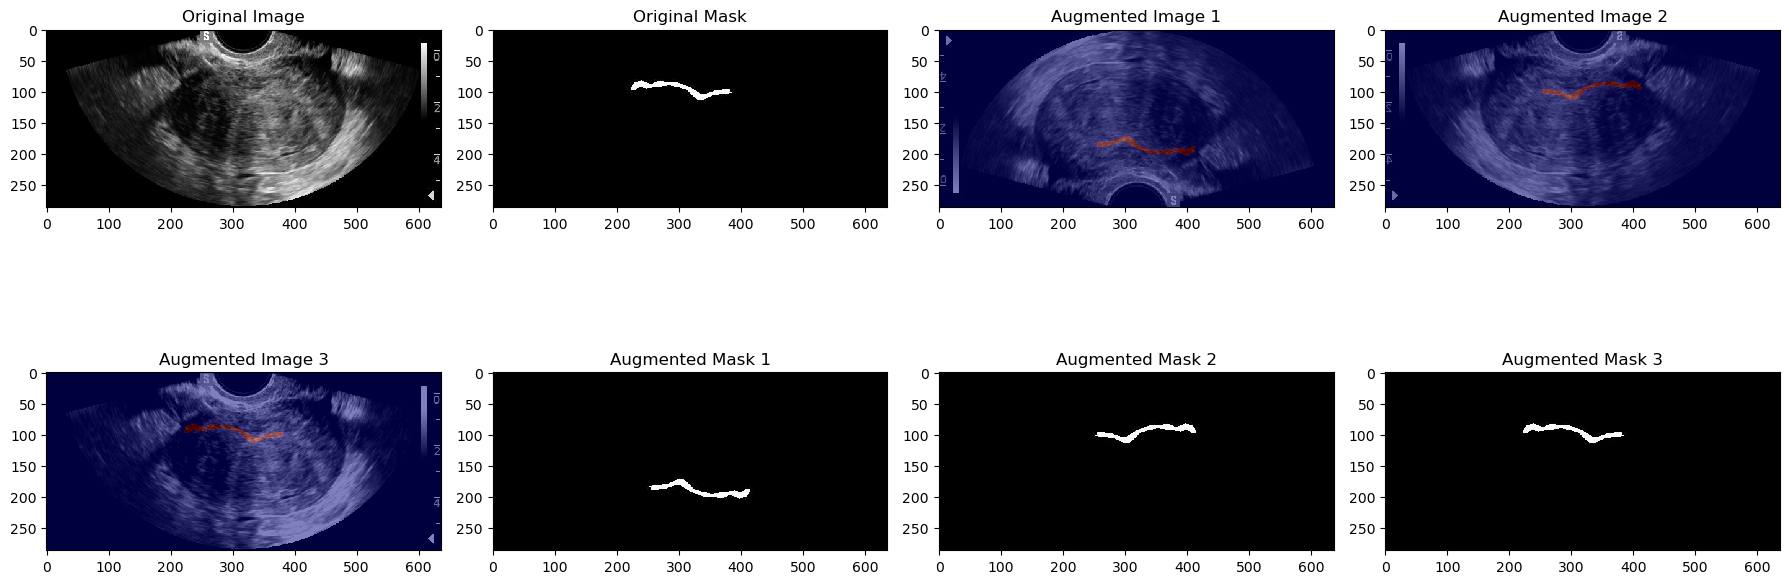

In [2]:
import numpy as np
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# Function to load a single frame and its corresponding mask
def load_single_frame(image_path, mask_path):
    img = np.array(Image.open(image_path).convert('L'))
    mask = np.array(Image.open(mask_path).convert('L'))
    return img, mask

# Function to rotate an image and its mask by 180 degrees
def rotate_180(image, mask):
    rotated_image = np.rot90(image, 2)
    rotated_mask = np.rot90(mask, 2)
    return rotated_image, rotated_mask

# Function to flip an image and its mask left-right
def flip_lr(image, mask):
    flipped_image = np.fliplr(image)
    flipped_mask = np.fliplr(mask)
    return flipped_image, flipped_mask

# Function to adjust the contrast of an image
def adjust_contrast(image, mask, factor=1.5):
    pil_img = Image.fromarray(image)
    enhancer = ImageEnhance.Contrast(pil_img)
    contrast_image = enhancer.enhance(factor)
    contrast_image = np.array(contrast_image)
    return contrast_image, mask

# Function to display original and augmented images and masks
def display_images(original_image, original_mask, augmented_images, augmented_masks):
    fig, axes = plt.subplots(2, 4, figsize=(18, 8))
    axes = axes.ravel()

    # Display original image and mask
    axes[0].imshow(original_image, cmap='gray', interpolation='none')
    axes[0].set_title('Original Image')
    axes[1].imshow(original_mask, cmap='gray', interpolation='none')
    axes[1].set_title('Original Mask')

    for i, (aug_img, aug_mask) in enumerate(zip(augmented_images, augmented_masks)):
        # Display augmented image
        axes[2 + i].imshow(aug_img, cmap='gray', interpolation='none')
        axes[2 + i].set_title(f'Augmented Image {i+1}')
        
        # Overlay augmented mask on the augmented image
        axes[2 + i].imshow(aug_mask, cmap='jet', alpha=0.5, interpolation='none')
        
        # Display augmented mask separately
        if i + 2 + len(augmented_images) < len(axes):
            axes[2 + len(augmented_images) + i].imshow(aug_mask, cmap='gray', interpolation='none')
            axes[2 + len(augmented_images) + i].set_title(f'Augmented Mask {i+1}')
    
    # Hide any unused subplots
    for j in range(2 + 2 * len(augmented_images), len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Main execution block
if __name__ == "__main__":
    image_path = r"Y:\Uterine_segmentation\AdenomyosisPatients\Bmode\CEUSPILOT021\Bmode_frame_1.jpg"
    mask_path = r"Y:\Uterine_segmentation\AdenomyosisPatients\Delineations\CEUSPILOT021\Bmode_frame_1.jpg"
    
    # Load the original image and mask
    original_image, original_mask = load_single_frame(image_path, mask_path)
    
    # Apply augmentations
    rotated_image, rotated_mask = rotate_180(original_image, original_mask)
    flipped_image, flipped_mask = flip_lr(original_image, original_mask)
    contrast_image, contrast_mask = adjust_contrast(original_image, original_mask)
    
    # Collect augmented images and masks
    augmented_images = [rotated_image, flipped_image, contrast_image]
    augmented_masks = [rotated_mask, flipped_mask, contrast_mask]
    
    # Display original and augmented images and masks
    display_images(original_image, original_mask, augmented_images, augmented_masks)


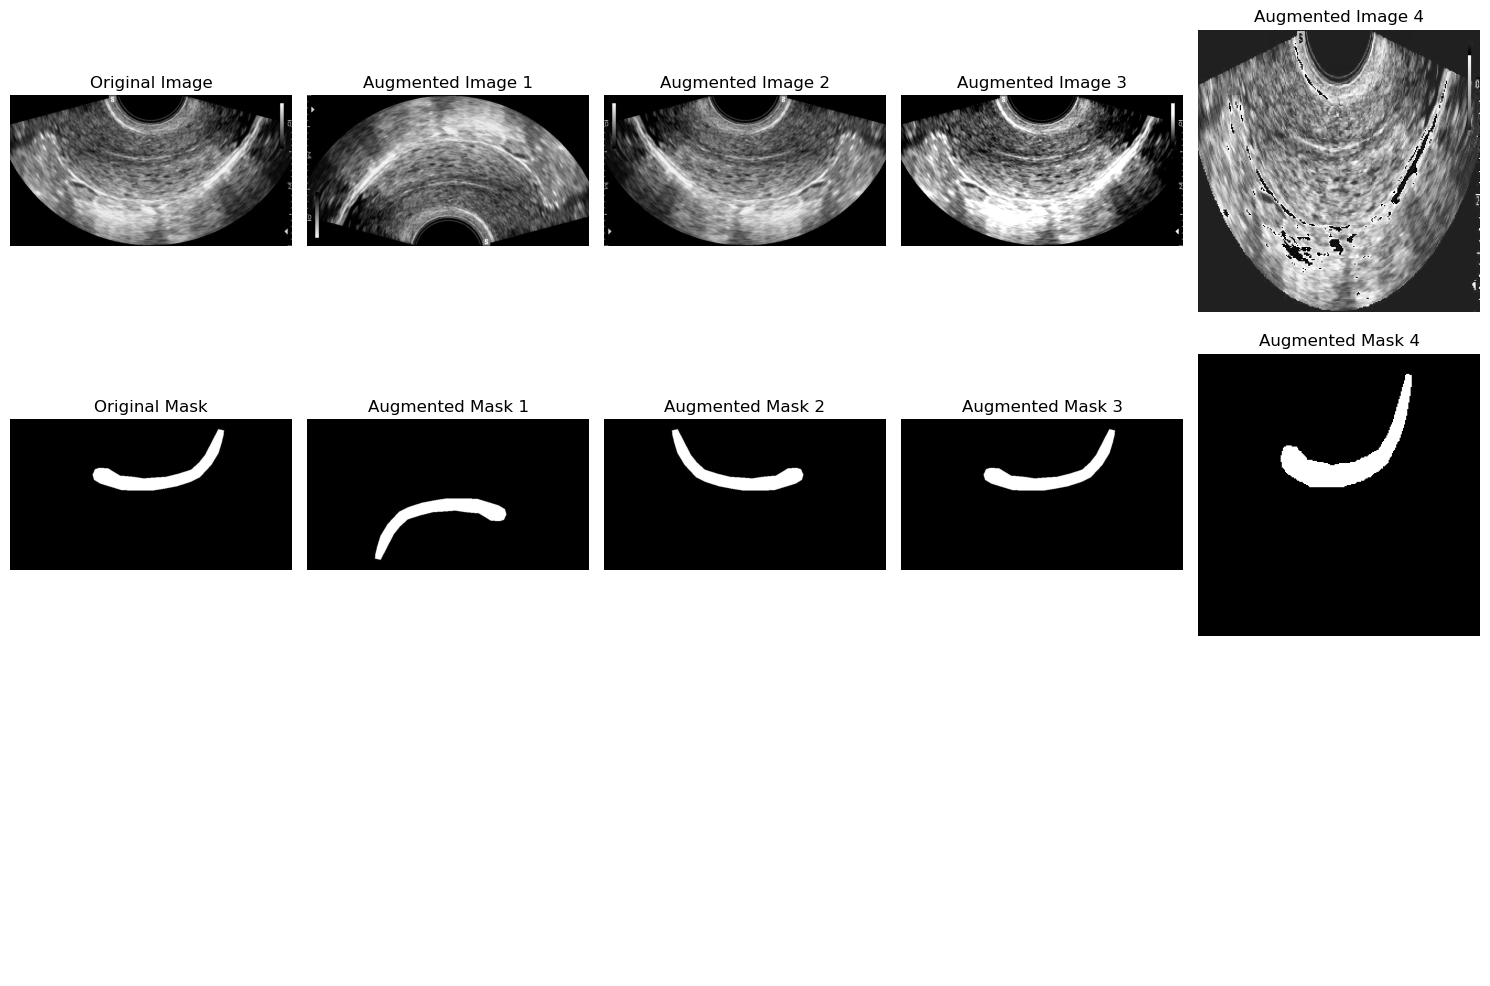

In [4]:
import numpy as np
from PIL import Image, ImageEnhance
import cv2
import os
import random
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

# Functions for image loading, augmentation, and normalization
def load_single_frame(image_path, mask_path):
    img = np.array(Image.open(image_path).convert('L'))
    mask = np.array(Image.open(mask_path).convert('L'))
    return img, mask

def rotate_180(image, mask):
    rotated_image = np.rot90(image, 2)
    rotated_mask = np.rot90(mask, 2)
    return rotated_image, rotated_mask

def flip_lr(image, mask):
    flipped_image = np.fliplr(image)
    flipped_mask = np.fliplr(mask)
    return flipped_image, flipped_mask

def adjust_contrast(image, mask, factor=1.5):
    pil_img = Image.fromarray(image)
    enhancer = ImageEnhance.Contrast(pil_img)
    contrast_image = enhancer.enhance(factor)
    contrast_image = np.array(contrast_image)
    return contrast_image, mask

def cropping_interpolate(img, mask, height, width):
    img = cv2.medianBlur(img, 1)
    clahe = cv2.createCLAHE(clipLimit=1)
    img = clahe.apply(img) + 30
    mask = cv2.GaussianBlur(mask, (9, 9), 0, 0)

    img = np.expand_dims(img, axis=-1)
    img = tf.image.resize(img, [height, width], method='nearest').numpy()

    mask = np.expand_dims(mask, axis=-1)
    mask_ = np.zeros((height, width, 1), dtype=np.bool_)
    mask = tf.image.resize(mask, [height, width], method='nearest').numpy()
    mask = np.maximum(mask_, mask)

    return img.squeeze(), mask.squeeze()

def min_max_normalize(X, Y):
    X = (X - np.min(X)) / (np.max(X) - np.min(X))
    Y = (Y - np.min(Y)) / (np.max(Y) - np.min(Y))
    Y = (Y > 0.5).astype(np.bool_)
    return X, Y

def show_images(original_image, original_mask, augmented_images, augmented_masks):
    fig, axes = plt.subplots(3, len(augmented_images) + 1, figsize=(15, 10))

    axes[0, 0].imshow(original_image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[1, 0].imshow(original_mask, cmap='gray')
    axes[1, 0].set_title('Original Mask')

    for i, (aug_img, aug_mask) in enumerate(zip(augmented_images, augmented_masks)):
        axes[0, i+1].imshow(aug_img, cmap='gray')
        axes[0, i+1].set_title(f'Augmented Image {i+1}')
        axes[1, i+1].imshow(aug_mask, cmap='gray')
        axes[1, i+1].set_title(f'Augmented Mask {i+1}')

    for ax in axes.flat:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    image_dirs = [
        r'Y:\Uterine_segmentation\HealthyVolunteers\Bmode\UV013',
        r'Y:\Uterine_segmentation\AdenomyosisPatients\Bmode\CEUSPILOT004'
    ]

    mask_dirs = [
        r'Y:\Uterine_segmentation\HealthyVolunteers\Delineations\UV013',
        r'Y:\Uterine_segmentation\AdenomyosisPatients\Delineations\CEUSPILOT004'
    ]

    selected_idx = 0
    img_dir, mask_dir = image_dirs[selected_idx], mask_dirs[selected_idx]

    image_paths = sorted(glob(os.path.join(img_dir, '*.jpg')))
    mask_paths = sorted(glob(os.path.join(mask_dir, '*.jpg')))

    img_path = image_paths[0]
    mask_path = mask_paths[0]

    original_image, original_mask = load_single_frame(img_path, mask_path)

    # Perform augmentations
    rotated_image, rotated_mask = rotate_180(original_image, original_mask)
    flipped_image, flipped_mask = flip_lr(original_image, original_mask)
    contrast_image, contrast_mask = adjust_contrast(original_image, original_mask)

    # Crop, resize and normalize original image and mask
    cropped_image, cropped_mask = cropping_interpolate(original_image, original_mask, 256, 256)
    normalized_image, normalized_mask = min_max_normalize(cropped_image, cropped_mask)

    # Collect augmented images and masks
    augmented_images = [rotated_image, flipped_image, contrast_image, normalized_image]
    augmented_masks = [rotated_mask, flipped_mask, contrast_mask, normalized_mask]

    # Show original and augmented images
    show_images(original_image, original_mask, augmented_images, augmented_masks)
